In [1]:
import numpy as np   
import pandas as pd 

# Load Dataset

In [2]:
data = pd.read_csv("newcreditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64596.0,-1.258069,1.143487,1.534709,-0.082581,-0.136726,0.121832,0.438377,0.124788,0.798379,...,-0.105313,0.313656,-0.180436,0.239458,0.141641,0.390568,0.302016,0.070574,3.79,0
1,64596.0,-3.511196,-4.010017,0.005029,2.000773,1.395612,-0.267210,0.983225,0.316680,-0.614382,...,0.837741,0.648378,2.133180,-0.353039,-0.132556,-0.305320,0.138434,0.350209,702.87,0
2,64596.0,1.108539,0.247769,1.044287,2.414754,-0.607787,-0.016459,-0.445858,0.241531,-0.440120,...,0.175196,0.358236,-0.053834,0.292676,0.343305,0.084936,-0.003799,0.016838,10.65,0
3,64596.0,1.157029,0.274859,0.387850,0.573217,-0.209966,-0.390377,-0.078646,0.059234,-0.270853,...,-0.193257,-0.551314,0.169881,0.188678,0.092090,0.093543,-0.008921,0.019575,1.29,0
4,64596.0,1.146760,1.132315,-1.529868,1.539633,0.888153,-1.178248,0.528649,-0.054473,-0.565206,...,-0.129857,-0.326769,-0.153466,-0.129527,0.691954,-0.291078,0.046054,0.083167,0.89,0


In [3]:
data.shape

(132387, 31)

In [4]:
data.isnull().sum().sum()

0

# Data cleaning¶


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132387 entries, 0 to 132386
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    132387 non-null  float64
 1   V1      132387 non-null  float64
 2   V2      132387 non-null  float64
 3   V3      132387 non-null  float64
 4   V4      132387 non-null  float64
 5   V5      132387 non-null  float64
 6   V6      132387 non-null  float64
 7   V7      132387 non-null  float64
 8   V8      132387 non-null  float64
 9   V9      132387 non-null  float64
 10  V10     132387 non-null  float64
 11  V11     132387 non-null  float64
 12  V12     132387 non-null  float64
 13  V13     132387 non-null  float64
 14  V14     132387 non-null  float64
 15  V15     132387 non-null  float64
 16  V16     132387 non-null  float64
 17  V17     132387 non-null  float64
 18  V18     132387 non-null  float64
 19  V19     132387 non-null  float64
 20  V20     132387 non-null  float64
 21  V21     13

<Axes: title={'center': 'Class'}>

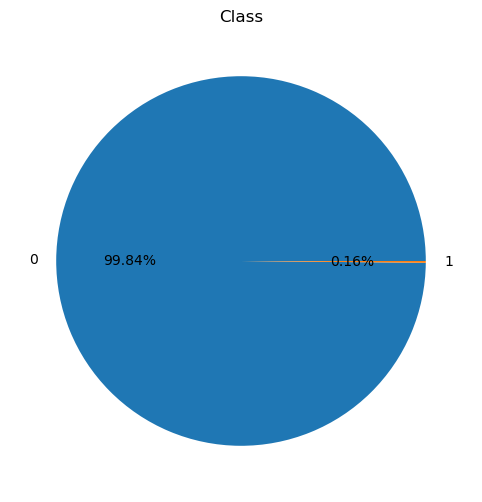

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,6))
data['Class'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Class')

In [7]:
data['Class'].value_counts()


0    132177
1       210
Name: Class, dtype: int64

# Split Data into 75% - 25%¶


In [8]:
from sklearn.model_selection import train_test_split
x = data.drop(['Class'], axis = 1)
y = data['Class']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 30 , random_state = 6000)
x_train[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
75505,137759.0,-0.791601,1.093123,1.162261,-0.453528,0.089344,0.780264,-0.648475,-2.666524,0.369721,...,0.839898,-1.077983,1.427035,-0.124350,0.640984,-0.269115,-0.226157,0.265610,0.052029,23.67
71480,135945.0,2.056111,0.226806,-2.549189,0.343245,0.754797,-1.361831,0.617996,-0.301381,0.174257,...,-0.302576,0.063452,0.210677,-0.059733,-0.518185,0.360537,-0.155060,-0.053403,-0.059577,11.00
44383,123773.0,-1.713529,-1.519104,0.954941,-1.262049,1.326979,-0.916081,-0.556128,0.294847,1.017324,...,-0.273965,0.373301,0.917068,0.078244,0.776340,-0.739655,-0.263774,0.053947,0.397463,74.95
111896,157570.0,1.863499,-0.572458,-0.622973,0.048740,0.131644,1.347478,-0.880721,0.581114,1.220860,...,-0.367471,-0.103714,-0.117954,0.382130,-1.706261,-0.624584,-0.506151,0.073775,-0.060863,3.99
105647,154041.0,-1.051261,0.567725,0.505168,-1.176316,1.797533,-0.415460,0.761620,0.188755,-0.563004,...,-0.015088,-0.323703,-1.239475,-0.297277,-0.046014,0.616950,0.227729,-0.084127,0.056803,1.29


# Scaling data¶


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
msc = MinMaxScaler()
x_train = msc.fit_transform(x_train)
x_test = msc.fit_transform(x_test)

# Logistic regression¶


In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

yhat = lr.predict(x_test)
print(lr.score(x_test, y_test))


0.8333333333333334


In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy score: " , accuracy_score(y_test,yhat))
print("Recall score: " ,recall_score(y_test,yhat, average='micro'))
print("Precision score: " ,precision_score(y_test,yhat , average='micro'))
print("F1 score: " ,f1_score(y_test,yhat , average='micro'))

Accuracy score:  0.8333333333333334
Recall score:  0.8333333333333334
Precision score:  0.8333333333333334
F1 score:  0.8333333333333334


# Decision Tree Classification

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
classifier.score(x_test,y_test)

0.5333333333333333

# Random Forest Classification

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
classifier = RandomForestClassifier(n_estimators=100,criterion='gini')
classifier.fit(x_train,y_train)


KeyboardInterrupt



In [ ]:
classifier.score(x_test,y_test)

# Support vector Classification

In [17]:
from sklearn.svm import SVC

In [18]:
classification_rbf = SVC(kernel='rbf')
classification_rbf.fit(x_train,y_train)

SVC()

In [19]:
classification_rbf.score(x_test,y_test)

0.9666666666666667